In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Load data
X, y = fetch_openml(data_id=41471, return_X_y=True)


In [8]:
# Normalize data
X = X / 255.0

# Repalce the labels with numbers
y = y.replace('TRUE', 1)
y = y.replace('FALSE', 0)

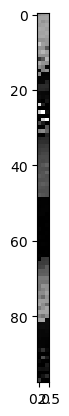

In [62]:
# visualize one of the images
image = np.array(X)[45].reshape(98, 3)
# show label of image
plt.imshow(image, cmap='gray')

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size: ", X_train.shape)
print("Test set size: ", X_test.shape)

In [ ]:
# Create a neural network
#test 1
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=100, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=0.1)

In [ ]:
# Create a neural network
#test 2
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 25, 10), max_iter=200, alpha=1e-4)

In [ ]:
#add grid search to find the best parameters

param_grid = {'hidden_layer_sizes': [(100, 100), (100, 50, 25, 10), (100, 50, 25, 10, 5)],
                'max_iter': [100, 200, 300],
                'alpha': [1e-4, 1e-3, 1e-2],
                'learning_rate_init': [0.1, 0.01, 0.001],
                'random_state': [1]}
mlp = MLPClassifier()

grid = GridSearchCV(mlp, param_grid, cv=5, verbose=10, n_jobs=-1)

In [ ]:
# Train the neural network
y_train_array = np.array(y_train).astype(np.int)
grid.fit(X_train, y_train_array)
best_params = grid.best_params_

In [ ]:
# show the grid search results
print("Best parameters: ", best_params)
print("Best score: ", grid.best_score_)
print("Best estimator: ", grid.best_estimator_)
print("Best params: ", grid.best_params_)

In [ ]:
# Test the neural network
y_test_array = np.array(y_test).astype(np.int)
y_pred = grid.predict(X_test)

score = grid.score(X_test, y_test_array)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test_array, y_pred)
print("Accuracy: ", accuracy)

# Calculate error
error = 1 - accuracy
print("Error: ", error)

In [ ]:
#plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_array, y_pred)
print(cm)